In [3]:
%load_ext autoreload
%autoreload 2
%aimport -jax
%aimport -jaxlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from jax.random import PRNGKey
import jax.numpy as jnp
import numpy as np
import jax

from stanza.envs.pymunk import PyMunkEnv, BodyState
import pymunk

def make_space(rng_key):
    space = pymunk.Space()
    space.gravity = (0, -9.8)
    body = pymunk.Body(1.0, 1.0)
    pos = jax.random.uniform(rng_key, (2,), minval=-1., maxval=1.)
    body.position = (10 + pos[0], 10 + pos[1])
    body.name = 'circle'
    space.add(body, pymunk.Circle(body, 1.0))
    return space

env = PyMunkEnv(width=15., height=15.,
    sim_hz=100., space_builder=make_space)
state = env.reset(PRNGKey(0))
state = env.step(state, None, None)

In [10]:
import stanza.policies as policies
rollout = policies.rollout(env.step, state, length=100)

{'circle': BodyState(position=Array([9.4325905, 5.757246 ], dtype=float32), velocity=Array([ 0.      , -9.799995], dtype=float32), angle=Array(0., dtype=float32), angular_velocity=Array(0., dtype=float32))}


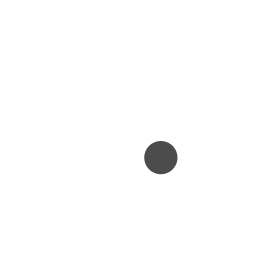

In [12]:
last_state = jax.tree_map(lambda x: x[-1], rollout.states)
print(last_state)
img = env.render(last_state)
from stanza.util.ipython import display_image
display_image(img)

In [13]:
imgs = jax.vmap(env.render)(rollout.states)
from stanza.util.ipython import display_video
display_video("pymunk.mp4", imgs, fps=100)

FFmpegNotFound: FFmpeg executables not found. Run `ffmpegio.set_path()` first or place FFmpeg executables in auto-detectable path locations.

{'agent': BodyState(position=Array([143., 314.], dtype=float32), velocity=Array([0., 0.], dtype=float32), angle=Array(0., dtype=float32), angular_velocity=Array(0., dtype=float32)), 'block': BodyState(position=Array([275.49786, 439.79633], dtype=float32), velocity=Array([0., 0.], dtype=float32), angle=Array(1.9058363, dtype=float32), angular_velocity=Array(0., dtype=float32))}


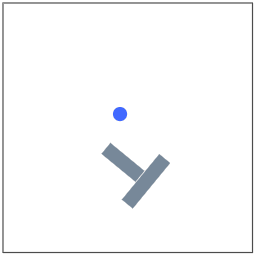

In [ ]:
from stanza.envs.pusht import PushTEnv

pusht_env = PushTEnv()
print(pusht_env.reset(PRNGKey(0)))
display_image(pusht_env.render(pusht_env.reset(PRNGKey(10))))